In [3]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/math627/adult.tsv', sep='\t')

Mounted at /content/drive


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [5]:
j=df[df['income']==1]
len(j)

11208

In [6]:
j['gender'][7]

' Male'

In [7]:
g=df[df['income']==0]
len(g)

34014

In [8]:
len(j[j['gender']==' Female'])

1669

In [9]:
len(j[j['gender']==' Male'])

9539

In [10]:
len(g[g['gender']==' Female'])

13026

In [11]:
len(g[g['gender']==' Male'])

20988

In [12]:
len(g[g['gender']==' Male'])+len(g[g['gender']==' Female'])

34014

In [13]:
len(j[j['gender']==' Male'])+len(j[j['gender']==' Female'])

11208

In [14]:
len(j[j['gender']==' Male'])+len(g[g['gender']==' Male'])

30527

In [15]:
len(j[j['gender']==' Female'])+len(g[g['gender']==' Female'])

14695

In [16]:
14695+30527

45222

In [17]:
13026/20988

0.6206403659233848

In [18]:
1669/9539

0.1749659293426984

In [19]:
#delete the row contain missing data
df = df.dropna()

In [20]:
#remove fnlwgt, save race in Z1, gender in Z2, income in Y and drop these
df=df.drop('fnlwgt',axis=1)
Z1=df['race']
Z2=df['gender']
Z3=df['relationship']
Y=df['income']
X=df.drop(['income','race','gender', 'education-num','relationship'], axis=1)

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=200)

In [22]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

categorical_features = X_train.select_dtypes(include=[object]).columns.tolist()

# encoding categorical features in train and test sets
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# covert to dataframe
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(), index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(), index=X_test.index)

#remove original sets and update new sets
X_train = X_train.drop(columns=categorical_features)
X_train = pd.concat([X_train, X_train_encoded], axis=1)

X_test = X_test.drop(columns=categorical_features)
X_test = pd.concat([X_test, X_test_encoded], axis=1)



In [23]:
print(X_train.dtypes)


Age                                  int64
capital gain                         int64
capital loss                         int64
hours per week                       int64
workclass_ Federal-gov             float64
                                    ...   
native-country_ Thailand           float64
native-country_ Trinadad&Tobago    float64
native-country_ United-States      float64
native-country_ Vietnam            float64
native-country_ Yugoslavia         float64
Length: 89, dtype: object


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [26]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

In [27]:
#seeks the optimal model parameters configuration for decision tree classifier
#systematically test the performance of the decision tree classifier across all given parameter combinations and identify the parameters that obtain the highest accuracy for the model.
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1)

In [28]:
#train model
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy', verbose=1)

In [29]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best cross-validation accuracy: 0.8560687157776348


In [30]:
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)
print("Test set accuracy:", accuracy_score(Y_test, Y_pred))

Test set accuracy: 0.8497512437810946


In [31]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(Y_test, Y_pred))
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6809
           1       0.75      0.59      0.66      2236

    accuracy                           0.85      9045
   macro avg       0.81      0.76      0.78      9045
weighted avg       0.84      0.85      0.84      9045

[[6365  444]
 [ 915 1321]]


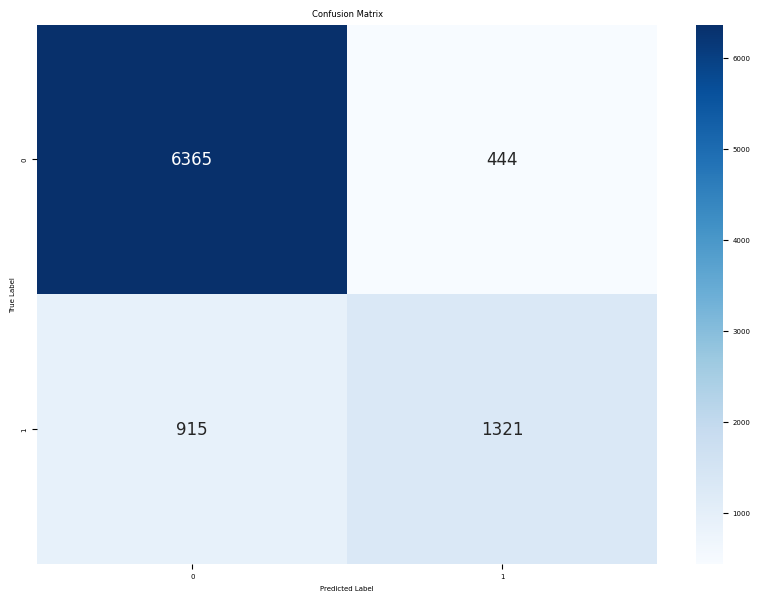

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'], annot_kws={"size": 12})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [33]:
# from sklearn.tree import DecisionTreeClassifier

# tree_classifier = DecisionTreeClassifier(random_state=42)
# tree_classifier.fit(X_train, Y_train)
# Y_pred = tree_classifier.predict(X_test)

# from sklearn.metrics import accuracy_score
# print("Accuracy:", accuracy_score(Y_test, Y_pred))


In [34]:
#convert gender from string to int
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Z22 = label_encoder.fit_transform(Z2.str.strip())

In [35]:
#split data
Z2_train=Z22[X_train.index]
Z2_test=Z22[X_test.index]

In [36]:
yy_train, yy_test, z_train, z_test, =train_test_split(Y_pred,Z2_test,test_size=0.1,random_state=10)

In [37]:
#convert to 2d
yy_train_2d = yy_train.reshape(-1, 1)
z_train_2d = z_train.reshape(-1, 1)

In [38]:
grid_search_s = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1)

In [39]:
grid_search_s.fit(yy_train_2d, z_train_2d)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy', verbose=1)

In [40]:
Z_pred = grid_search_s.predict(yy_test.reshape(-1, 1))

In [41]:
accuracy = accuracy_score(z_test.reshape(-1, 1), Z_pred)
print(f"Accuracy of gender prediction using Logistic Regression: {accuracy:.4f}")

Accuracy of gender prediction using Logistic Regression: 0.6552


In [42]:
print(Y_train.dtypes)
print(Y_test.dtypes)


int64
int64


In [43]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=20,
                       random_state=42)

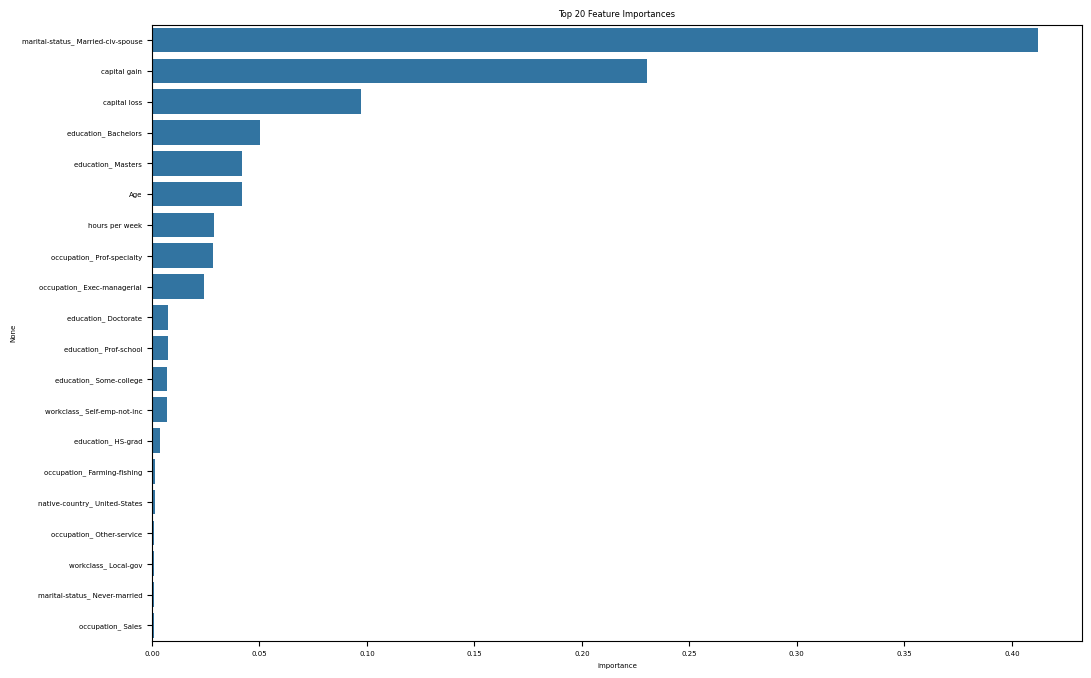

In [44]:
feature_importances = pd.DataFrame(grid_search.best_estimator_.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)


top_features = feature_importances.head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_features.importance, y=top_features.index)
plt.title('Top 20 Feature Importances')
plt.show()


In [45]:
X_test['Y_truth']=Y_test
X_test['Y_pred']=Y_pred

In [46]:
Y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [47]:
!git clone https://github.com/cohortshapley/cohortshapley
!pip install -e cohortshapley

Cloning into 'cohortshapley'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 49 (delta 17), reused 42 (delta 10), pack-reused 0
Receiving objects: 100% (49/49), 1.84 MiB | 17.57 MiB/s, done.
Resolving deltas: 100% (17/17), done.
Obtaining file:///content/cohortshapley
  Preparing metadata (setup.py) ... done
  Running setup.py develop for cohortshapley


In [48]:
pip install --upgrade cohortshapley

In [49]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from cohortshapley.cohortshapley import similarity
from cohortshapley.cohortshapley import cohortshapley as cs

In [50]:
Y_1=pd.DataFrame()

In [51]:
X_test['TP'] = ((X_test['Y_pred'] == 1).values & (X_test['Y_truth'] == 1).values).astype(int)
X_test['FP'] = ((X_test['Y_pred'] == 1).values & (X_test['Y_truth'] == 0).values).astype(int)
X_test['TN'] = ((X_test['Y_pred'] == 1).values & (X_test['Y_truth'] == 0).values).astype(int)
X_test['FN'] = ((X_test['Y_pred'] == 1).values & (X_test['Y_truth'] == 1).values).astype(int)

In [52]:
X_test

,Age,capital gain,capital loss,hours per week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,Y_truth,Y_pred,TP,FP,TN,FN
10246,49,0,0,40,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0,0,0,0,0,0
9865,40,15024,0,50,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1,1,1,0,0,1
6569,25,0,0,48,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0,0,0,0,0,0
7887,19,0,1602,40,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0,0,0,0,0,0
44398,29,0,0,50,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25651,38,0,0,45,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1,1,1,0,0,1
32233,57,15024,0,40,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1,1,1,0,0,1
80,33,0,0,50,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0,1,0,1,1,0
26621,80,1409,0,40,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0,0,0,0,0,0


In [53]:
X_test['Gender']=Z2[X_test.index]
X_test['Race']=Z1[X_test.index]
X_test['Gender'].replace([' Male', ' Female'], [1, 0], inplace=True)
X_test['Race'].replace(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'], [1, 2,3,4,5], inplace=True)
X_test

,Age,capital gain,capital loss,hours per week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Vietnam,native-country_ Yugoslavia,Y_truth,Y_pred,TP,FP,TN,FN,Gender,Race
10246,49,0,0,40,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,1,White
9865,40,15024,0,50,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1,1,1,0,0,1,1,White
6569,25,0,0,48,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,1,White
7887,19,0,1602,40,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,White
44398,29,0,0,50,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,1,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25651,38,0,0,45,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1,1,1,0,0,1,1,White
32233,57,15024,0,40,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1,1,1,0,0,1,0,White
80,33,0,0,50,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0,1,0,1,1,0,1,White
26621,80,1409,0,40,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0,0,0,0,0,0,1,White


In [54]:
is_priv = X_test['Gender'] == 0
is_unpriv = ~is_priv
n_priv = is_priv.sum()
n_unpriv = is_unpriv.sum()
print('Number of subjects in  privileged group: ', n_priv, ' unpriviledged group: ', n_unpriv)

Number of subjects in  privileged group:  2970  unpriviledged group:  6075


In [55]:
priv_r = X_test['Y_truth'][is_priv]
unpriv_r = X_test['Y_truth'][is_unpriv]
priv_r_ratio = (priv_r == 1).sum() / n_priv
unpriv_r_ratio = (unpriv_r == 1).sum() / n_unpriv
print('Priviledged group: ', priv_r_ratio, ' unpriviledged group: ', unpriv_r_ratio)
print('Total: ', X_test['Y_truth'].mean())
print('Demographic parity: ', unpriv_r_ratio - priv_r_ratio )

Priviledged group:  0.11245791245791245  unpriviledged group:  0.31308641975308643
Total:  0.24720840243228304
Demographic parity:  0.20062850729517398


In [56]:
priv_fpr = X_test['FP'][is_priv].sum() / (X_test['FP'][is_priv].sum() + X_test['TN'][is_priv].sum())
unpriv_fpr = X_test['FP'][is_unpriv].sum() / (X_test['FP'][is_unpriv].sum() + X_test['TN'][is_unpriv].sum())
print('Priviledged group: ', priv_fpr, ' unpriviledged group: ', unpriv_fpr)
print('Equal opportunity: ', unpriv_fpr - priv_fpr )
print('Total: ', X_test['FP'].sum() / (X_test['FP'].sum() + X_test['TN'].sum()))

Priviledged group:  0.5  unpriviledged group:  0.5
Equal opportunity:  0.0
Total:  0.5


In [57]:
X_wr=X_test['Gender'].reset_index()

In [58]:
X_wr

,index,Gender
0,10246,1
1,9865,1
2,6569,1
3,7887,0
4,44398,1
...,...,...
9040,25651,1
9041,32233,0
9042,80,1
9043,26621,1


In [59]:
subject = X_wr.values
similarity.ratio = 0.1
f=False
cs_truth = cs.CohortShapley(f, similarity.similar_in_samebin, np.arange(len(subject)), subject, y=X_test['Y_truth'], parallel=10)

use given y values instead of model prediction.


In [60]:
X_test['Y_truth'].reset_index()

,index,Y_truth
0,10246,0
1,9865,1
2,6569,0
3,7887,0
4,44398,0
...,...,...
9040,25651,1
9041,32233,1
9042,80,0
9043,26621,0


In [61]:
cs_truth.compute_cohort_shapley()

parallel processing with 10 processes
use given y values instead of model prediction.use given y values instead of model prediction.use given y values instead of model prediction.


use given y values instead of model prediction.

  0%|          | 0/905 [00:00<?, ?it/s]


use given y values instead of model prediction.use given y values instead of model prediction.

use given y values instead of model prediction.

  0%|          | 0/905 [00:00<?, ?it/s]


use given y values instead of model prediction.

  1%|          | 5/905 [00:00<00:18, 48.31it/s]


use given y values instead of model prediction.use given y values instead of model prediction.

  0%|          | 0/904 [00:00<?, ?it/s]

100%|██████████| 905/905 [00:20<00:00, 44.92it/s]


In [62]:
subject = X_wr.values
similarity.ratio = 0.1
f=False
cs_pred = cs.CohortShapley(f, similarity.similar_in_samebin, np.arange(len(subject)), subject, y=X_test['Y_pred'], parallel=10)

use given y values instead of model prediction.


In [63]:
cs_pred.compute_cohort_shapley()

parallel processing with 10 processes
use given y values instead of model prediction.use given y values instead of model prediction.use given y values instead of model prediction.

use given y values instead of model prediction.
use given y values instead of model prediction.use given y values instead of model prediction.
use given y values instead of model prediction.use given y values instead of model prediction.

  0%|          | 0/905 [00:00<?, ?it/s]

  0%|          | 0/905 [00:00<?, ?it/s]

  0%|          | 0/905 [00:00<?, ?it/s]

  0%|          | 0/905 [00:00<?, ?it/s]

use given y values instead of model prediction.


  0%|          | 0/904 [00:00<?, ?it/s]

use given y values instead of model prediction.

  0%|          | 0/904 [00:00<?, ?it/s]

100%|██████████| 905/905 [00:23<00:00, 38.39it/s]

100%|██████████| 904/904 [00:23<00:00, 38.24it/s]



In [64]:
def conditioned_shapley_hist(X, bin_val, shapley_values, condvar, expvar, bin_label=None, ylim=(0,3000), xlim=None):
    vals = bin_val[condvar]
    col = X.columns
    n_vals = len(vals)
    cond = {}
    for k in range(n_vals):
        cond[k] = np.where(X[col[condvar]] == vals[k])[0]
    jj = expvar
    for k in range(n_vals):
        v = shapley_values[:,jj]
        n_bins = 70
        bins = np.linspace(v.min(),v.max()+0.001, n_bins+1, endpoint=True)
        if bin_label:
            l = bin_label[k]
        else:
            l = k
        plt.hist(shapley_values[cond[k]][:,jj], bins=bins, alpha=0.8,label=l)
    plt.ylim(ylim)
    if xlim:
        plt.xlim(xlim)

In [65]:
bin_X_wr = similarity.binning(X_wr.values)
bin_idx = bin_X_wr[0]
bin_val = bin_X_wr[1]

In [66]:
bin_val

[array([1.20000000e+01, 4.53200010e+03, 9.05200020e+03, 1.35720003e+04,
        1.80920004e+04, 2.26120005e+04, 2.71320006e+04, 3.16520007e+04,
        3.61720008e+04, 4.06920009e+04, 4.52120010e+04]),
 array([0, 1])]

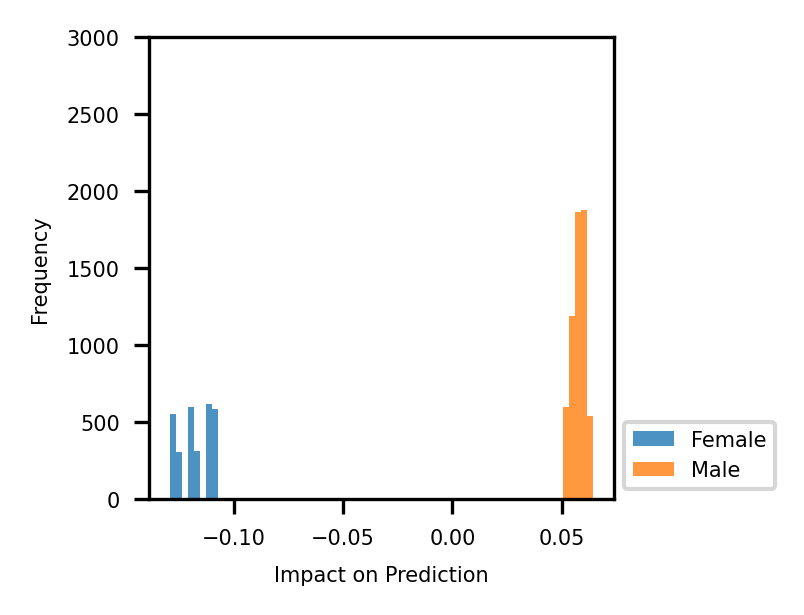

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
# fig = plt.figure(figsize=(2,2),dpi=300)
# plt.rcParams["font.size"] = 5
# conditioned_shapley_hist(X_wr, bin_val, cs_pred.shapley_values,1,1, bin_label=['Female','Male'])
# plt.legend(bbox_to_anchor=(1,0), loc='lower left')
# plt.xlabel('Impact on Prediction')
# plt.ylabel('Frequency')

import matplotlib.pyplot as plt
from google.colab import files

# 创建图形并设置大小和分辨率
fig = plt.figure(figsize=(2,2), dpi=300)
plt.rcParams["font.size"] = 5

# 这里假设conditioned_shapley_hist是一个用于绘图的函数
# 示例中的参数需要根据你的数据和变量具体定义
conditioned_shapley_hist(X_wr, bin_val, cs_pred.shapley_values, 1, 1, bin_label=['Female', 'Male'])

# 设置图例位置
plt.legend(bbox_to_anchor=(1, 0), loc='lower left')

# 添加坐标轴标签
plt.xlabel('Impact on Prediction')
plt.ylabel('Frequency')

# 保存图形到Colab的临时环境
plt.savefig('my_plot.png', bbox_inches='tight')

# 显示图形
plt.show()

# 下载图形到你的本地机器
files.download('my_plot.png')


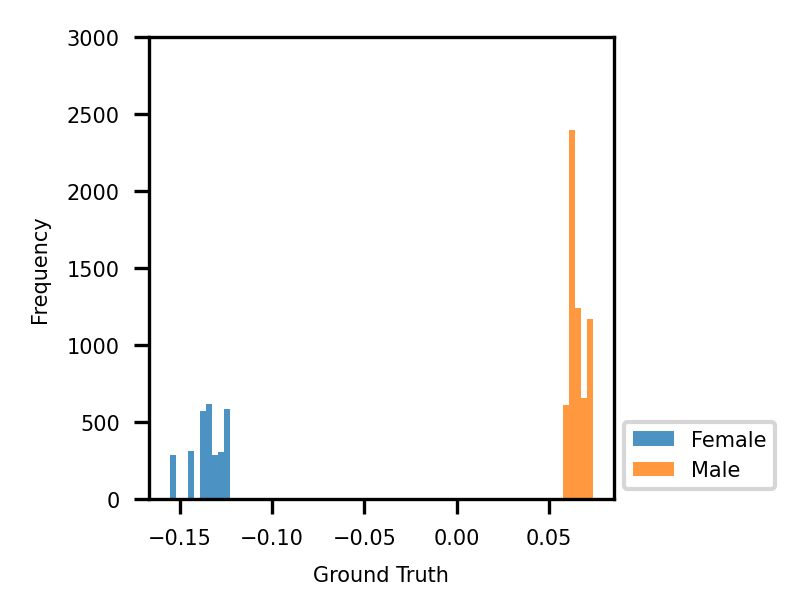

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
# fig = plt.figure(figsize=(2,2),dpi=300)
# plt.rcParams["font.size"] = 5
# conditioned_shapley_hist(X_wr, bin_val, cs_truth.shapley_values,1,1, bin_label=['Female','Male'])
# plt.legend(bbox_to_anchor=(1,0), loc='lower left')
# plt.xlabel('Ground Truth')
# plt.ylabel('Frequency')

import matplotlib.pyplot as plt
from google.colab import files

# 创建图形并设置大小和分辨率
fig = plt.figure(figsize=(2,2), dpi=300)
plt.rcParams["font.size"] = 5

# 绘制图形，假设`conditioned_shapley_hist`是一个有效的函数，且相关数据已正确设置
conditioned_shapley_hist(X_wr, bin_val, cs_truth.shapley_values, 1, 1, bin_label=['Female', 'Male'])

# 设置图例位置
plt.legend(bbox_to_anchor=(1, 0), loc='lower left')

# 设置坐标轴标签
plt.xlabel('Ground Truth')
plt.ylabel('Frequency')

# 保存图形到Colab的临时环境
plt.savefig('shapley_plot.png', bbox_inches='tight')

# 显示图形
plt.show()

# 下载图形到你的本地机器
files.download('shapley_plot.png')
